In [ ]:
#Importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import seaborn as sb


In [ ]:
pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import category_encoders as ce

In [ ]:
df= pd.read_csv("/content/prosperLoanData.csv")
df

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,258.0
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,41.0
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,158.0
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5521,921F359791988189826B737,1054309,2013-12-17 19:40:20.503000000,NaN,36,Current,NaN,0.16324,0.1274,0.1174,...,-25.19,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5522,922C3584559189387FE6DF7,850385,2013-07-24 16:27:14.363000000,NaN,36,Current,NaN,0.26528,0.2272,0.2172,...,-13.73,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5523,92313591852208787BEC744,950236,2013-10-16 07:56:09.410000000,NaN,36,Current,NaN,0.30899,0.2699,0.2599,...,-13.11,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5524,9AA0352771696617879517B,531191,2011-10-07 09:19:31.173000000,NaN,36,Current,NaN,0.35643,0.3199,0.3099,...,-33.22,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,47.0


In [ ]:
def encode_loan_status(row):
    if row["LoanCurrentDaysDelinquent"] > 0:
        return "Delinquent"
    else:
        return "Non-Delinquent"

In [ ]:
df["EncodedLoanStatus"] = df.apply(encode_loan_status, axis=1)


In [ ]:
binary_encoder = ce.BinaryEncoder(cols=["EncodedLoanStatus"])
df_encoded = binary_encoder.fit_transform(df)

In [ ]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,EncodedLoanStatus
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,258.0,Non-Delinquent
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,Non-Delinquent
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,41.0,Non-Delinquent
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,158.0,Non-Delinquent
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,20.0,Non-Delinquent


In [ ]:
df_encoded = df_encoded.drop(["LoanStatus", "LoanCurrentDaysDelinquent"], axis=1)

In [ ]:
print(df_encoded.head())

                ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term           ClosedDate  BorrowerAPR  BorrowerRate  \
0           C    36  2009-08-14 00:00:00      0.16516        0.1580   
1         NaN    36                  NaN      0.12016        0.0920   
2          HR    36  2009-12-17 00:00:00      0.28269        0.2750   
3         NaN    36                  NaN      0.12528        0.0974   
4         NaN    36                  NaN      0.24614        0.2085   

   LenderYield  EstimatedEffectiveYield  ...  LP_GrossPrincipalLoss  \
0       0.1380                      NaN  ... 

In [ ]:
# Create a new column called "LoanStatus"
df["LoanStatus"] = df["LoanCurrentDaysDelinquent"] > 180

In [ ]:
# Replace the values in the "LoanStatus" column
df["LoanStatus"] = df["LoanStatus"].replace({True: 0, False: 1})

In [ ]:
# Print the first few rows of the dataset
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,EncodedLoanStatus
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,1,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,258.0,Non-Delinquent
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,1,NaN,0.12016,0.0920,0.0820,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,Non-Delinquent
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,1,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,41.0,Non-Delinquent
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,1,NaN,0.12528,0.0974,0.0874,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,158.0,Non-Delinquent
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,1,NaN,0.24614,0.2085,0.1985,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,20.0,Non-Delinquent


In [ ]:
df.isnull().sum()

ListingKey                        0
ListingNumber                     0
ListingCreationDate               0
CreditGrade                    4132
Term                              0
                               ... 
Recommendations                   1
InvestmentFromFriendsCount        1
InvestmentFromFriendsAmount       1
Investors                         1
EncodedLoanStatus                 0
Length: 82, dtype: int64

In [ ]:
df["CreditGrade"] = df["CreditGrade"].fillna(df["CreditGrade"].mode()[0])

In [ ]:
df

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,EncodedLoanStatus
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,1,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,258.0,Non-Delinquent
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,B,36,1,NaN,0.12016,0.0920,0.0820,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,Non-Delinquent
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,1,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,41.0,Non-Delinquent
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,B,36,1,NaN,0.12528,0.0974,0.0874,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,158.0,Non-Delinquent
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,B,36,1,NaN,0.24614,0.2085,0.1985,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,20.0,Non-Delinquent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5521,921F359791988189826B737,1054309,2013-12-17 19:40:20.503000000,B,36,1,NaN,0.16324,0.1274,0.1174,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,Non-Delinquent
5522,922C3584559189387FE6DF7,850385,2013-07-24 16:27:14.363000000,B,36,1,NaN,0.26528,0.2272,0.2172,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,Non-Delinquent
5523,92313591852208787BEC744,950236,2013-10-16 07:56:09.410000000,B,36,1,NaN,0.30899,0.2699,0.2599,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,Non-Delinquent
5524,9AA0352771696617879517B,531191,2011-10-07 09:19:31.173000000,B,36,1,NaN,0.35643,0.3199,0.3099,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,47.0,Non-Delinquent


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5526 entries, 0 to 5525
Data columns (total 82 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ListingKey                           5526 non-null   object 
 1   ListingNumber                        5526 non-null   int64  
 2   ListingCreationDate                  5526 non-null   object 
 3   CreditGrade                          5526 non-null   object 
 4   Term                                 5526 non-null   int64  
 5   LoanStatus                           5526 non-null   int64  
 6   ClosedDate                           2657 non-null   object 
 7   BorrowerAPR                          5525 non-null   float64
 8   BorrowerRate                         5526 non-null   float64
 9   LenderYield                          5526 non-null   float64
 10  EstimatedEffectiveYield              4127 non-null   float64
 11  EstimatedLoss                 

In [ ]:
import pandas as pd

# Calculate the percentage of missing values for each column
missing_values = df.isna().sum() / len(df)

# Find the columns with more than 75% missing values
columns_with_more_than_75_missing_values = missing_values[missing_values > 0.75].index

# Print the names of the columns with more than 75% missing values
print(columns_with_more_than_75_missing_values)

Index(['GroupKey', 'TotalProsperLoans', 'TotalProsperPaymentsBilled',
       'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate',
       'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed',
       'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing',
       'LoanFirstDefaultedCycleNumber'],
      dtype='object')


In [ ]:
# Drop the columns
df = df.drop(['GroupKey', 'TotalProsperLoans', 'TotalProsperPaymentsBilled',
       'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate',
       'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed',
       'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing',
       'LoanFirstDefaultedCycleNumber'], axis=1)

In [ ]:
# Print the first few rows of the dataset
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,EncodedLoanStatus
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,1,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,258.0,Non-Delinquent
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,B,36,1,NaN,0.12016,0.0920,0.0820,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,Non-Delinquent
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,1,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,41.0,Non-Delinquent
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,B,36,1,NaN,0.12528,0.0974,0.0874,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,158.0,Non-Delinquent
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,B,36,1,NaN,0.24614,0.2085,0.1985,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,20.0,Non-Delinquent


In [ ]:
df.shape

(5526, 72)

In [ ]:
df['CreditGrade'].isnull().sum()

0

In [ ]:
df.describe()

,ListingNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,5.526000e+03,5526.000000,5526.000000,5525.000000,5526.000000,5526.000000,4127.000000,4127.000000,4127.000000,4127.000000,...,5525.000000,5525.000000,5525.000000,5525.000000,5525.000000,5525.000000,5525.000000,5525.000000,5525.000000,5525.000000
mean,6.320182e+05,40.933768,0.871697,0.218618,0.192497,0.182463,0.169404,0.080449,0.096436,4.072207,...,-54.745397,-14.560567,704.082659,689.006614,22.078733,0.998582,0.045973,0.021900,16.879316,79.597285
std,3.286775e+05,10.415006,0.334457,0.080202,0.074720,0.074433,0.068277,0.046713,0.030583,1.666330,...,61.810521,103.014563,2437.336318,2423.254880,236.424090,0.017726,0.276500,0.198815,277.850229,104.213861
min,3.600000e+01,12.000000,0.000000,0.016570,0.010000,0.005000,-0.083600,0.004900,-0.083600,1.000000,...,-442.140000,-2806.040000,0.000000,-110.660000,0.000000,0.700500,0.000000,0.000000,0.000000,1.000000
25%,4.045002e+05,36.000000,1.000000,0.156290,0.133400,0.123400,0.117900,0.042400,0.074080,3.000000,...,-72.270000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,6.023530e+05,36.000000,1.000000,0.208690,0.181900,0.171900,0.161900,0.072400,0.091200,4.000000,...,-33.630000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,42.000000
75%,9.025095e+05,36.000000,1.000000,0.283700,0.250000,0.240000,0.225400,0.112000,0.117350,5.000000,...,-13.130000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,112.000000
max,1.247835e+06,60.000000,1.000000,0.402430,0.360000,0.352500,0.319900,0.366000,0.257000,7.000000,...,5.070000,0.000000,25000.000000,25000.000000,7940.240000,1.000000,9.000000,9.000000,12459.550000,899.000000


**Exploratary Data Analysis**

In [ ]:
# Check for missing values
missing_values = df.isna().sum()

In [ ]:
# Impute missing values with the mean for numerical columns
for column in df.select_dtypes(include=[np.number]):
    df[column] = df[column].fillna(df[column].mean())

# Impute missing values with the mode for object columns
for column in df.select_dtypes(include=[object]):
    df[column] = df[column].fillna(df[column].mode()[0])

# Print the first few rows of the dataset
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,EncodedLoanStatus
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,1,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,258.0,Non-Delinquent
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,B,36,1,2013-08-20 00:00:00,0.12016,0.0920,0.0820,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,Non-Delinquent
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,1,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,41.0,Non-Delinquent
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,B,36,1,2013-08-20 00:00:00,0.12528,0.0974,0.0874,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,158.0,Non-Delinquent
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,B,36,1,2013-08-20 00:00:00,0.24614,0.2085,0.1985,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,20.0,Non-Delinquent


In [ ]:
df.isnull().sum()

ListingKey                     0
ListingNumber                  0
ListingCreationDate            0
CreditGrade                    0
Term                           0
                              ..
Recommendations                0
InvestmentFromFriendsCount     0
InvestmentFromFriendsAmount    0
Investors                      0
EncodedLoanStatus              0
Length: 72, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5526 entries, 0 to 5525
Data columns (total 72 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ListingKey                          5526 non-null   object 
 1   ListingNumber                       5526 non-null   int64  
 2   ListingCreationDate                 5526 non-null   object 
 3   CreditGrade                         5526 non-null   object 
 4   Term                                5526 non-null   int64  
 5   LoanStatus                          5526 non-null   int64  
 6   ClosedDate                          5526 non-null   object 
 7   BorrowerAPR                         5526 non-null   float64
 8   BorrowerRate                        5526 non-null   float64
 9   LenderYield                         5526 non-null   float64
 10  EstimatedEffectiveYield             5526 non-null   float64
 11  EstimatedLoss                       5526 no

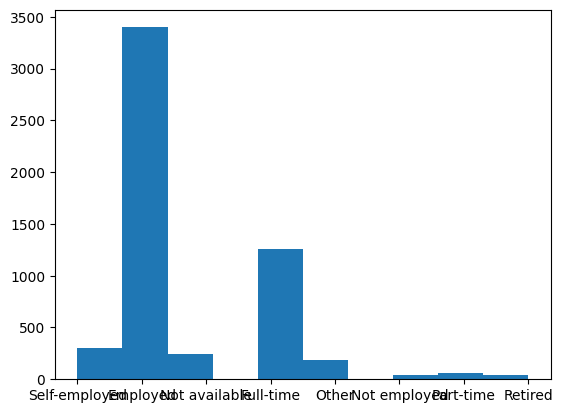

In [ ]:
# Plot the distribution of the data
plt.hist(df['EmploymentStatus'])
plt.show()

**Checking For Outliers**

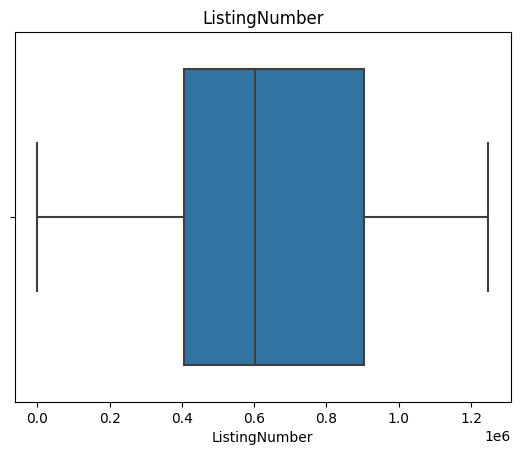

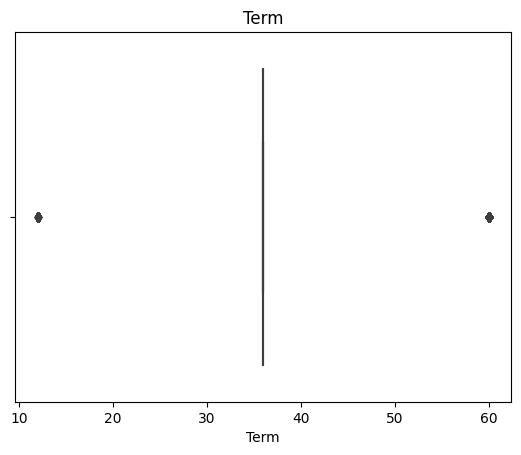

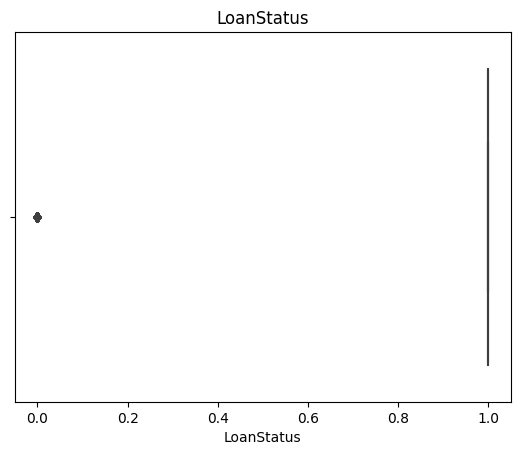

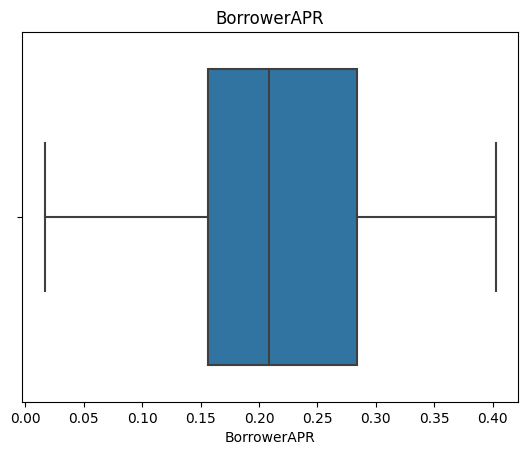

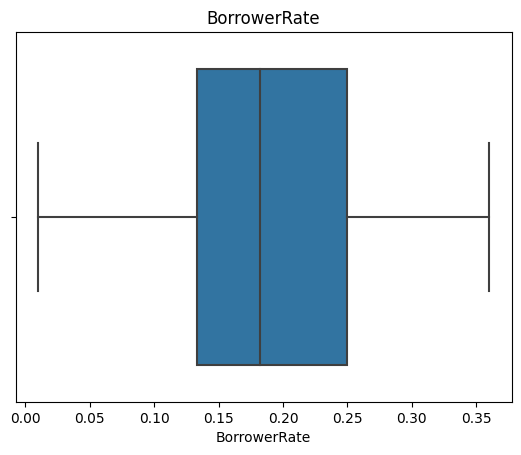

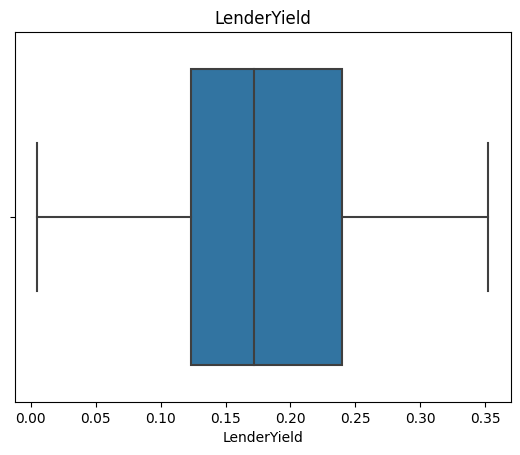

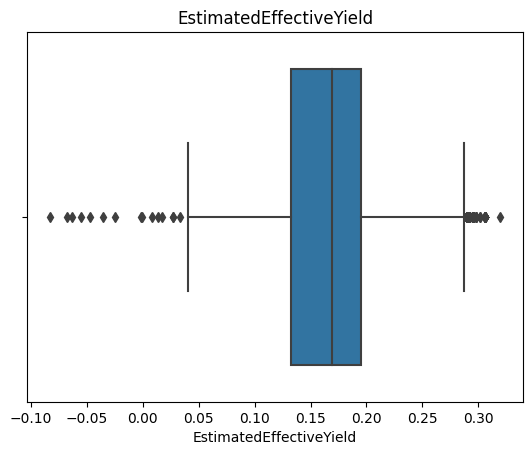

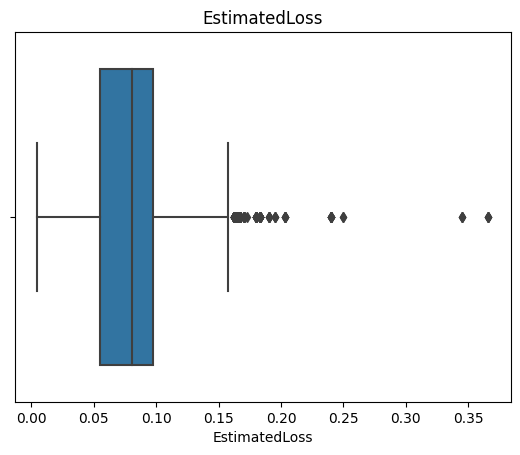

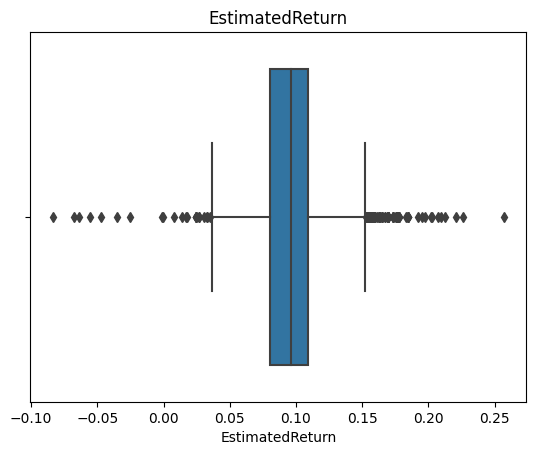

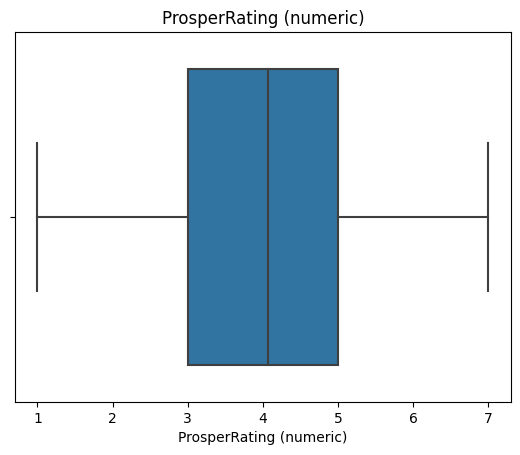

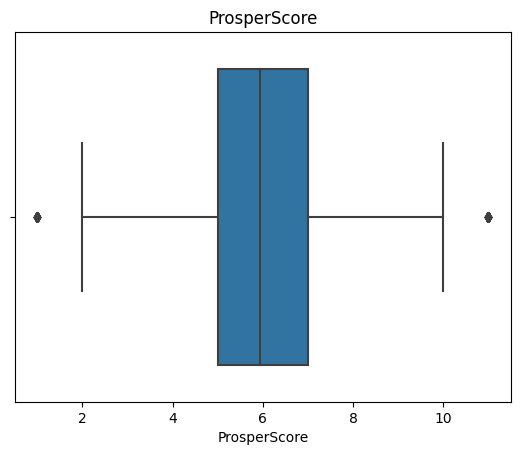

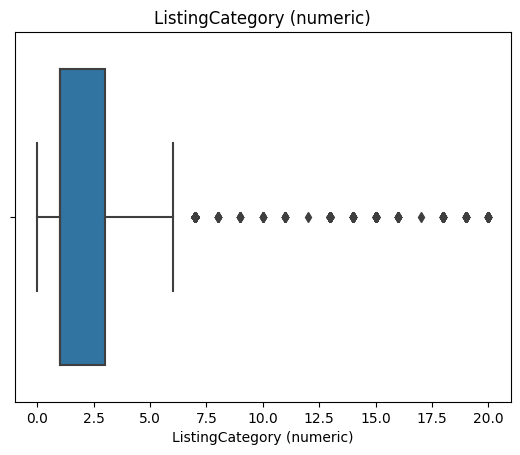

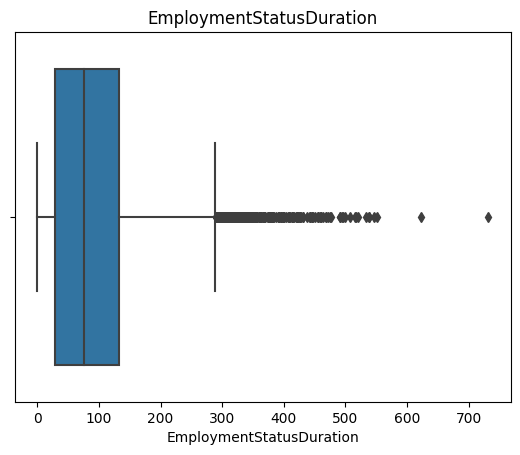

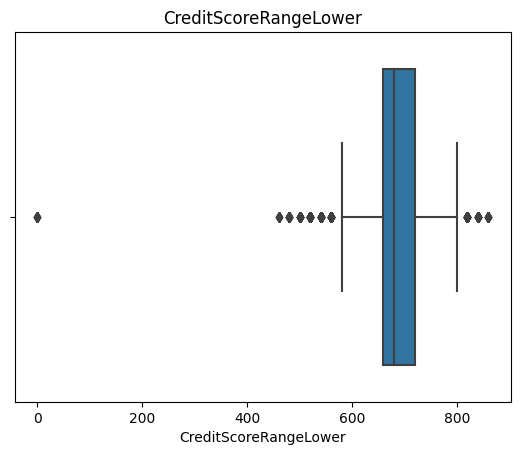

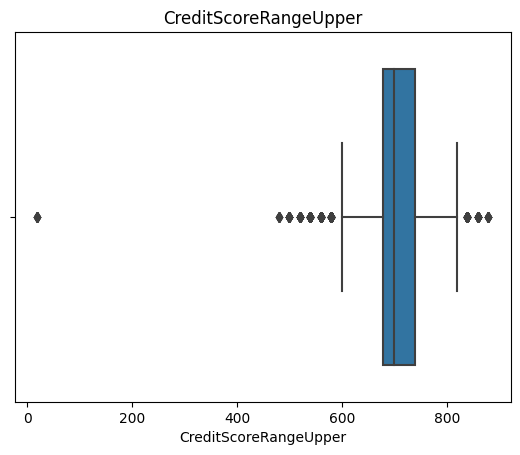

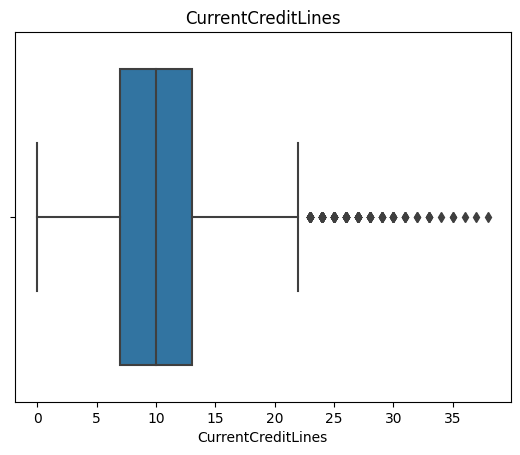

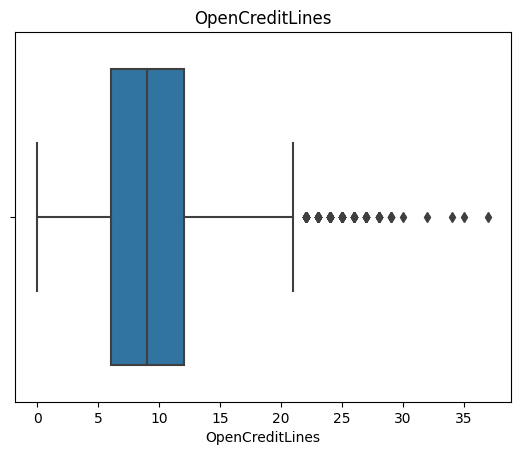

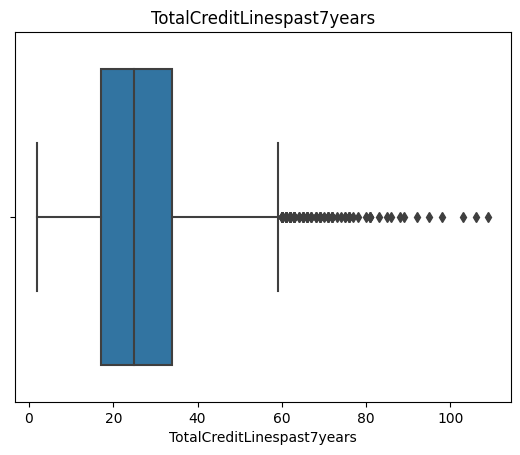

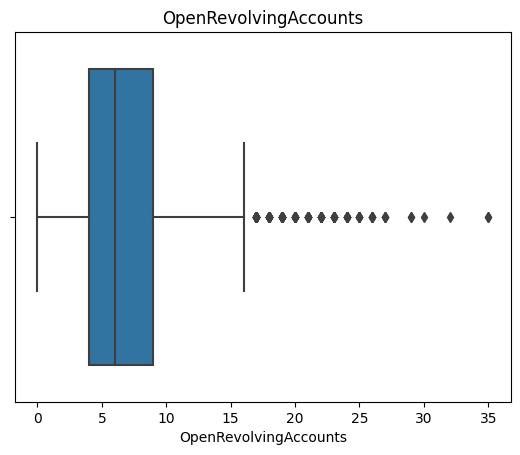

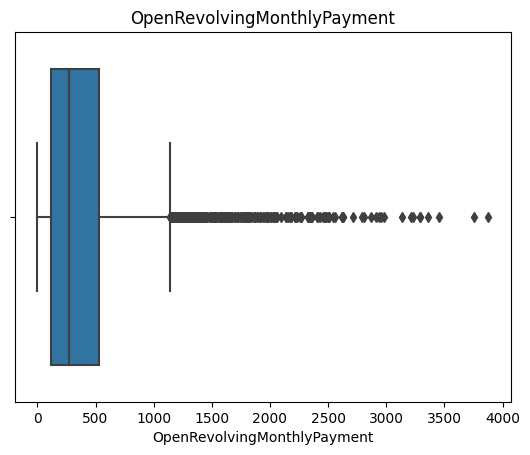

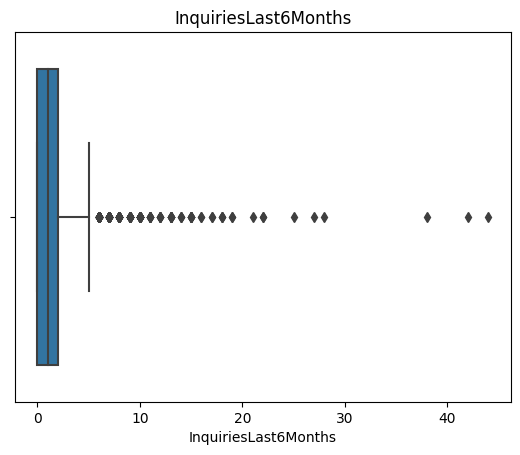

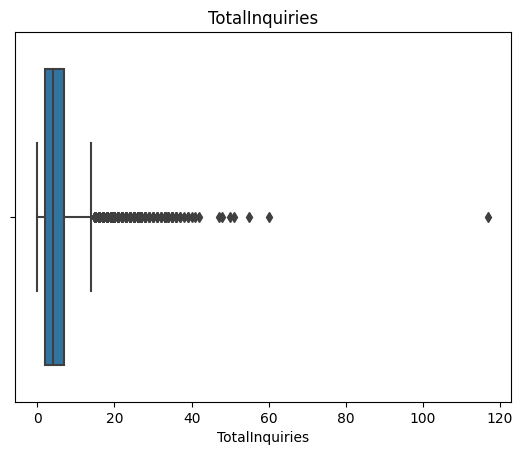

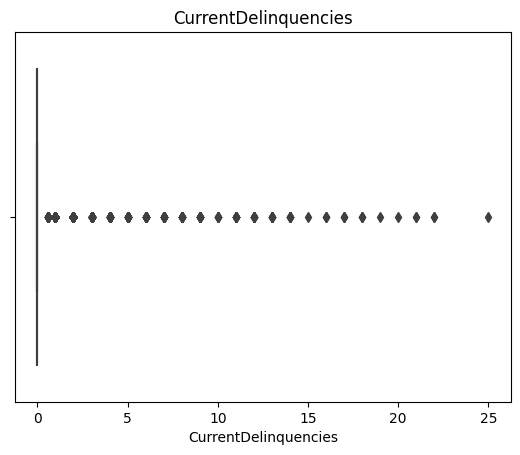

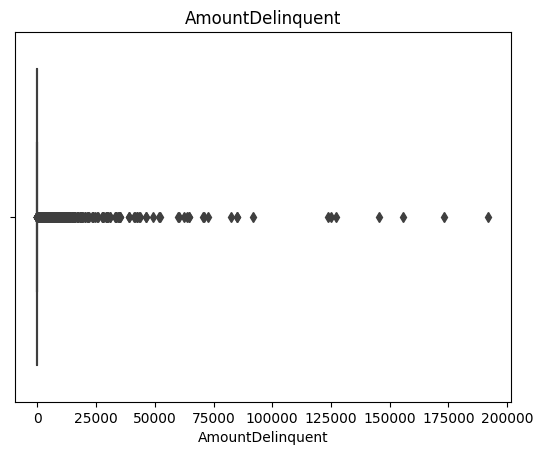

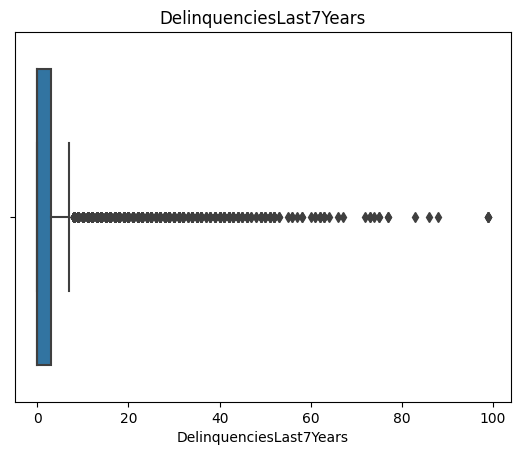

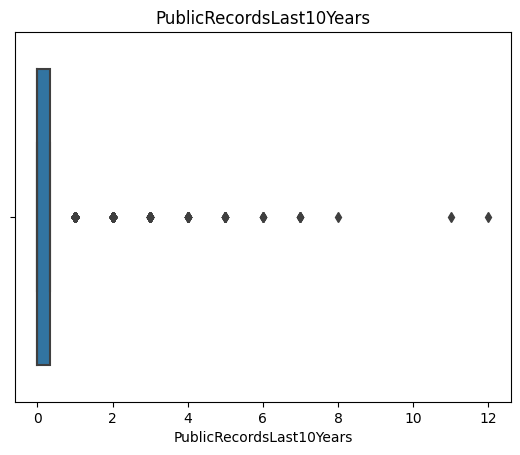

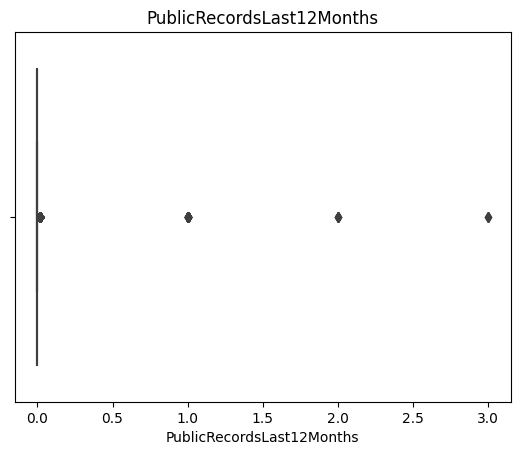

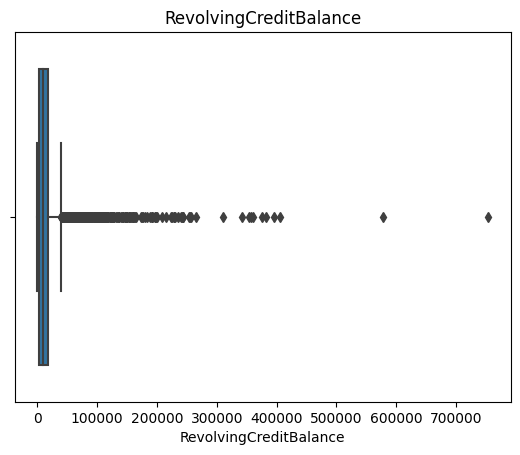

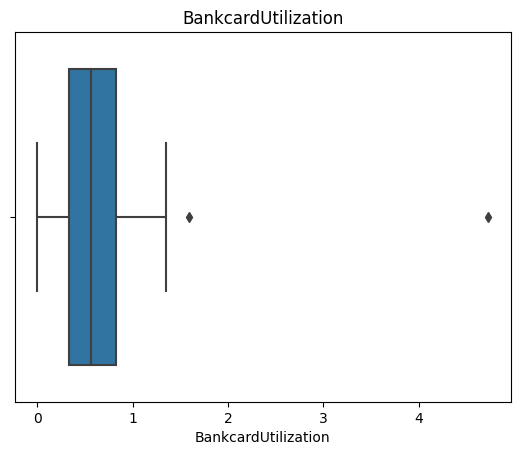

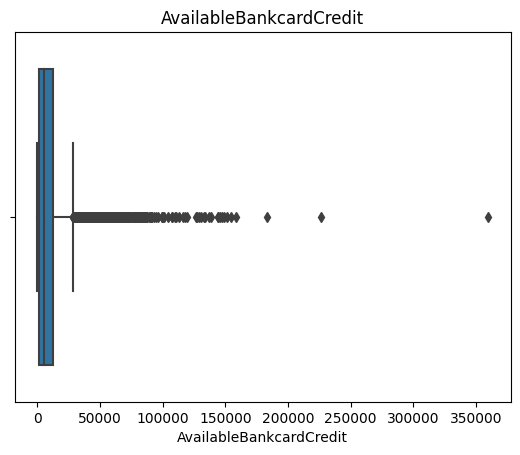

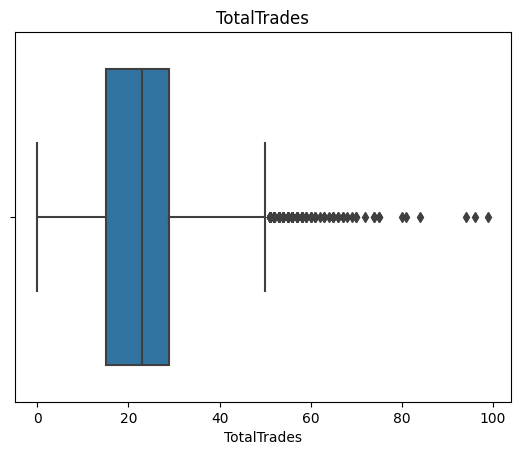

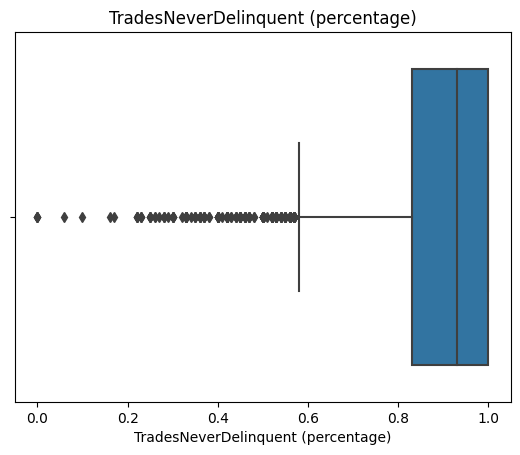

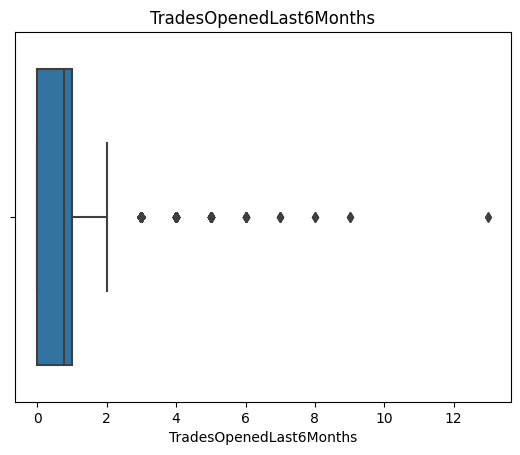

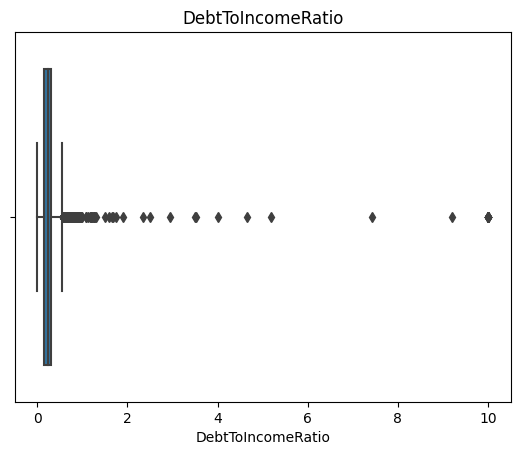

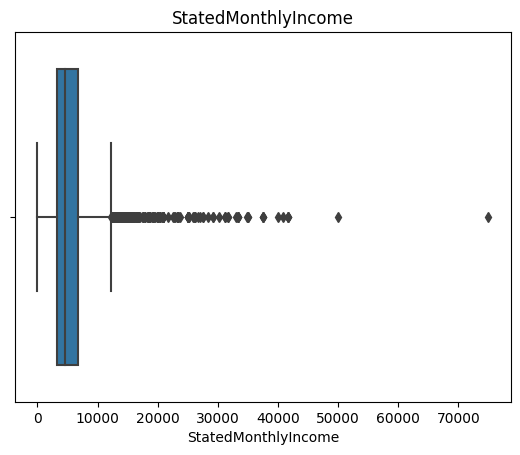

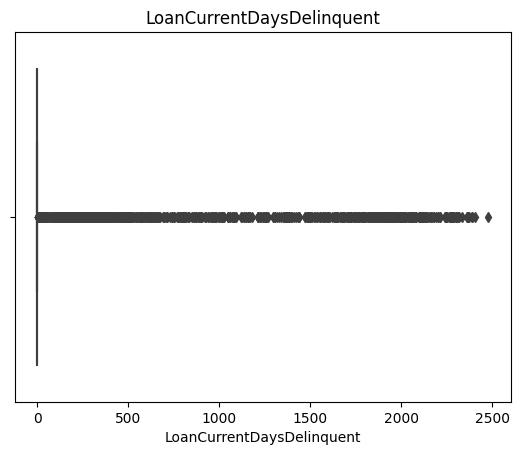

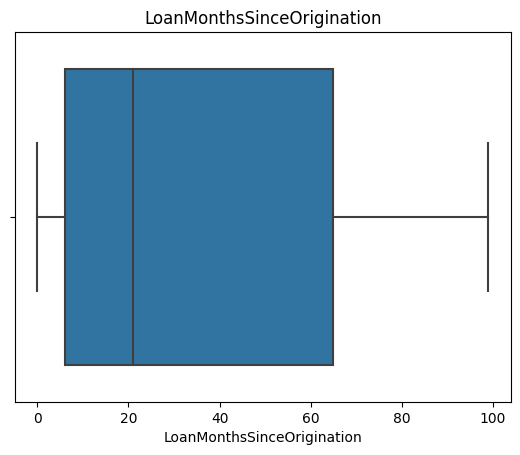

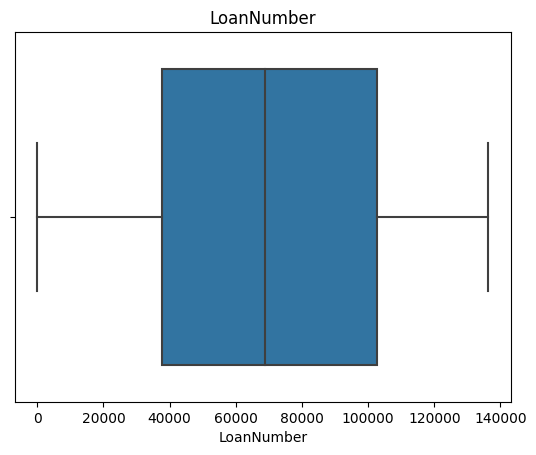

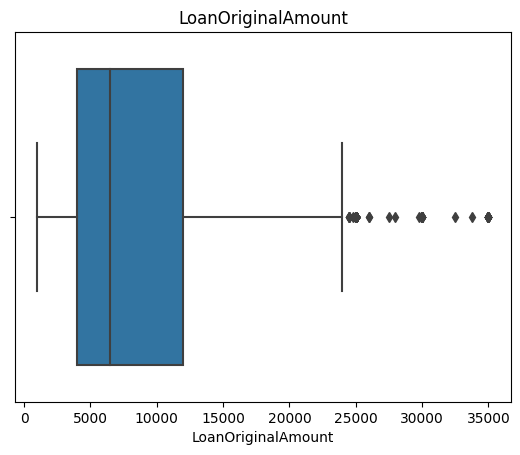

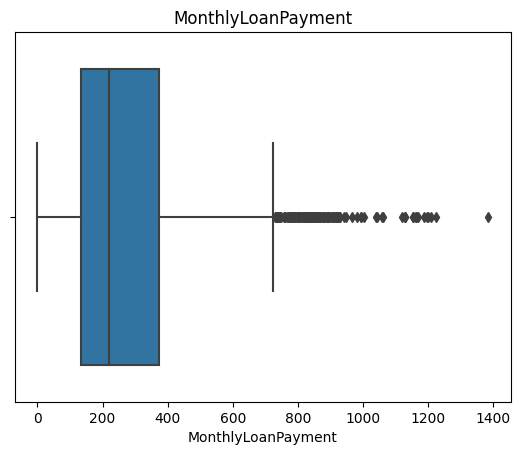

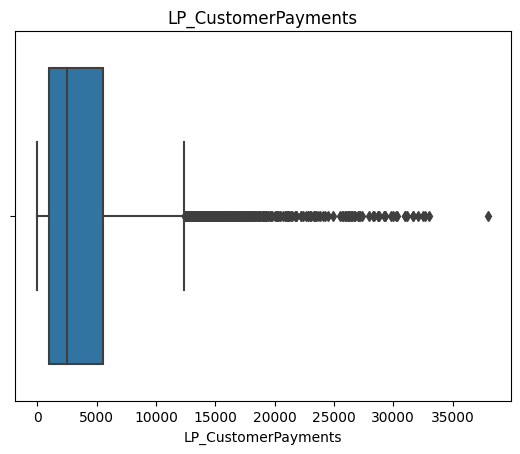

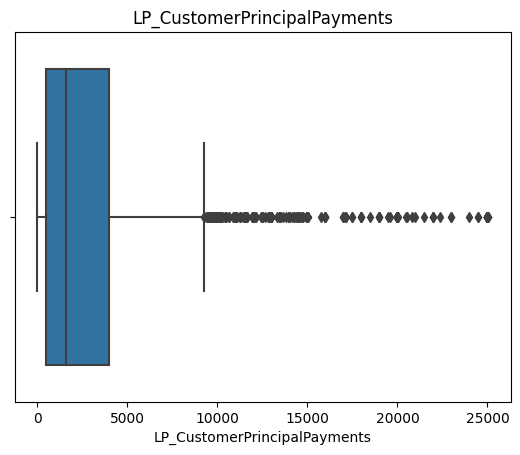

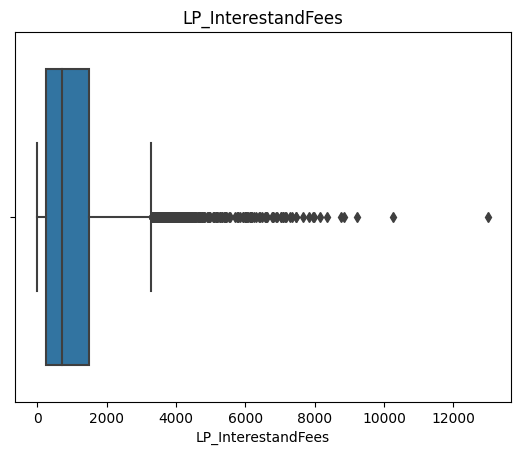

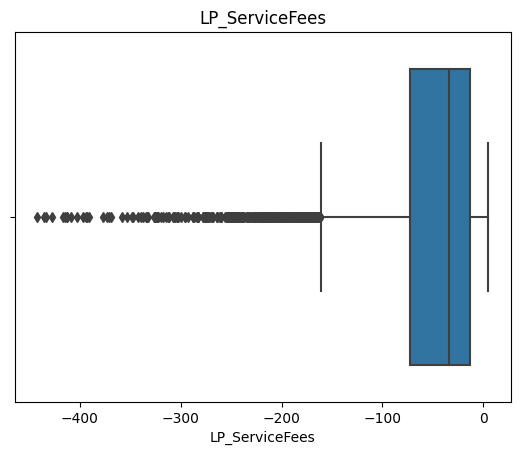

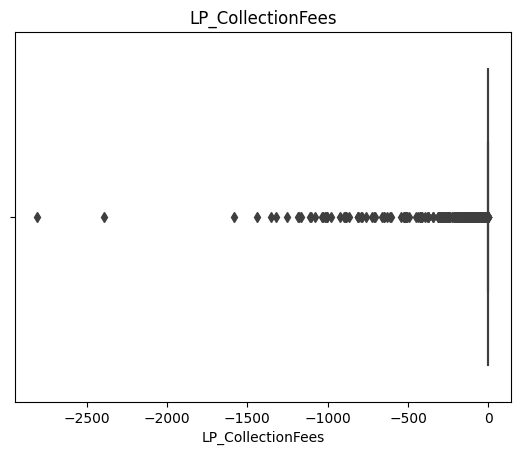

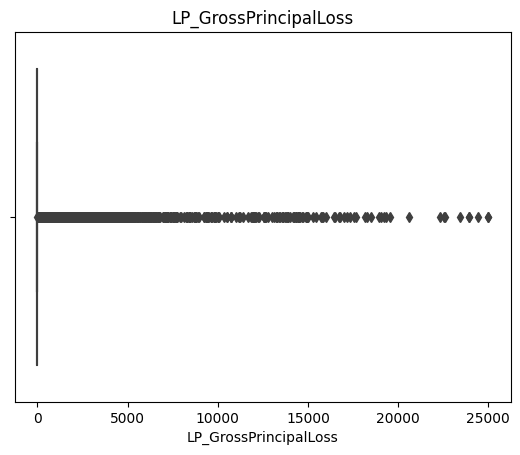

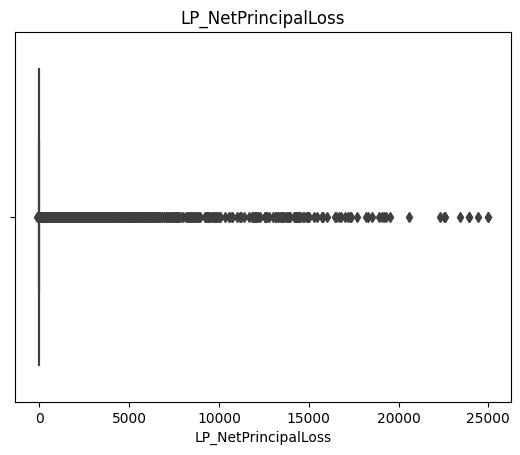

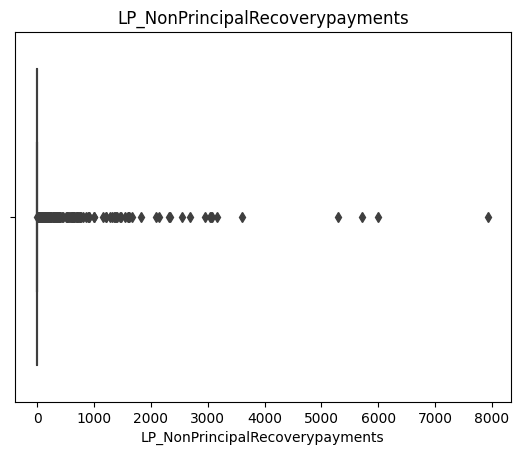

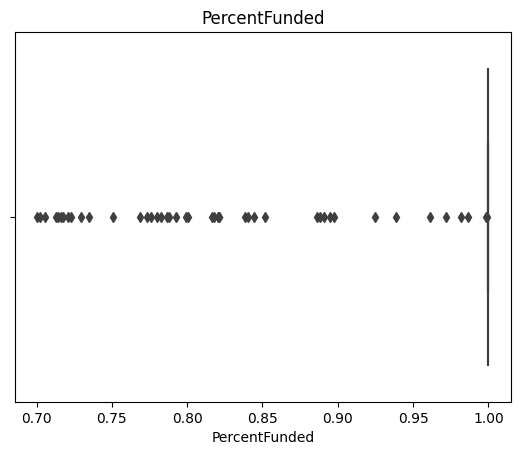

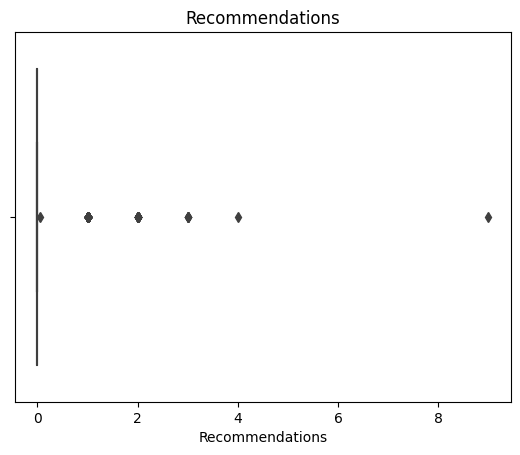

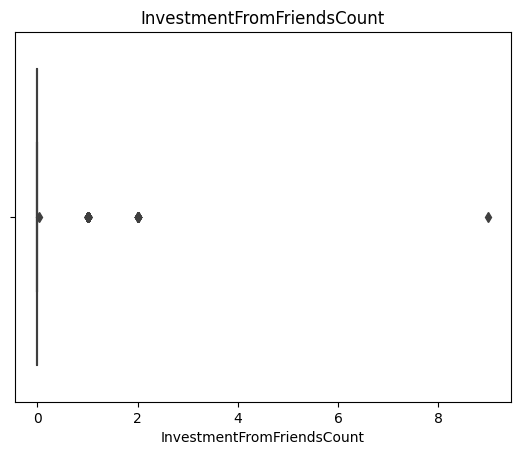

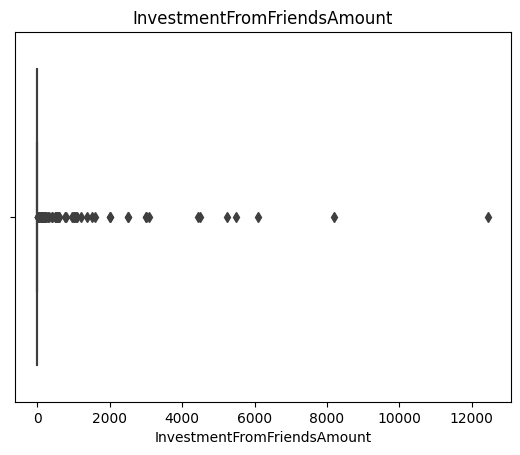

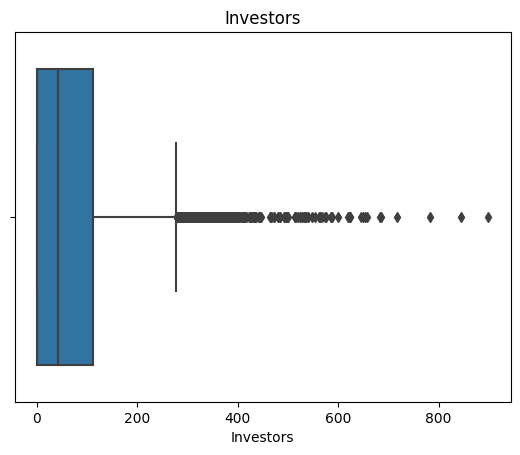

In [ ]:
# Visualize the distribution of numerical columns

numerical_columns = df.select_dtypes(include=np.number).columns
for column in numerical_columns:
    sns.boxplot(x=df[column])
    plt.title(column)
    plt.show()

In [ ]:
df.shape

(5526, 72)

In [ ]:
# Identify outliers using z-score

z_scores = np.abs((df[numerical_columns] - df[numerical_columns].mean()) / df[numerical_columns].std())
threshold = 3  # Adjust the threshold as needed

In [ ]:
# Create a DataFrame to store the indices of outliers

outlier_indices = pd.DataFrame()
for column in numerical_columns:
    outlier_indices = pd.concat([outlier_indices, z_scores[z_scores[column] > threshold][column]])

In [ ]:
# Remove outliers from the dataset

df = df.drop(outlier_indices.index)

In [ ]:
df.shape

(3607, 72)

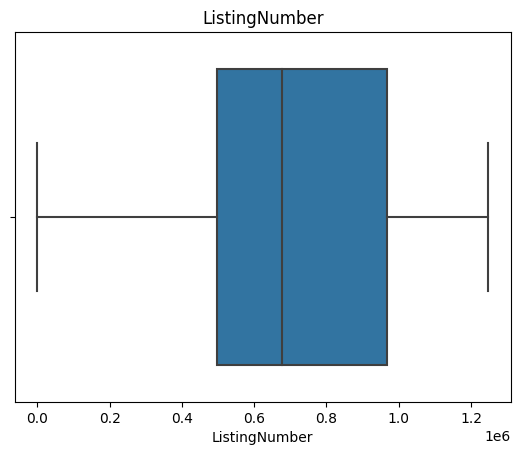

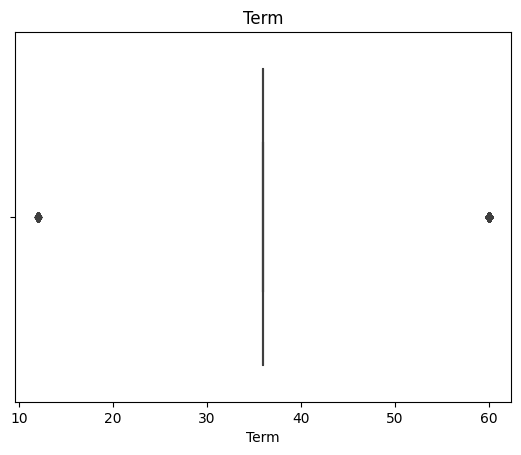

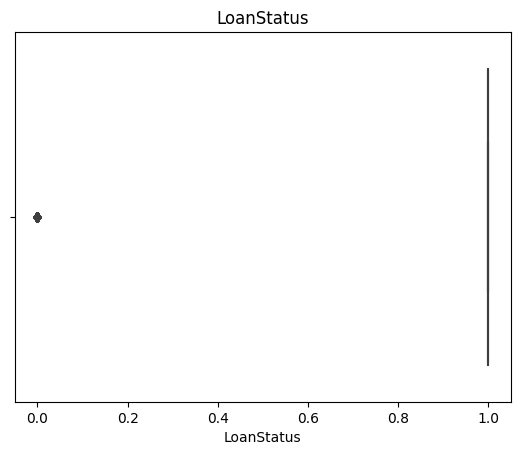

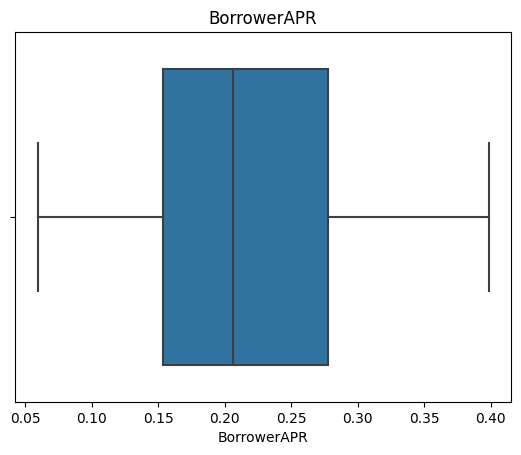

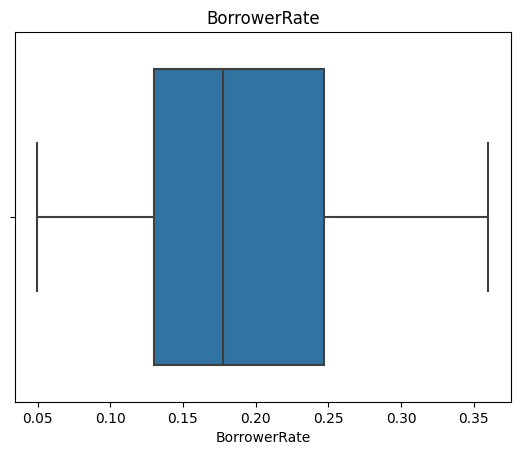

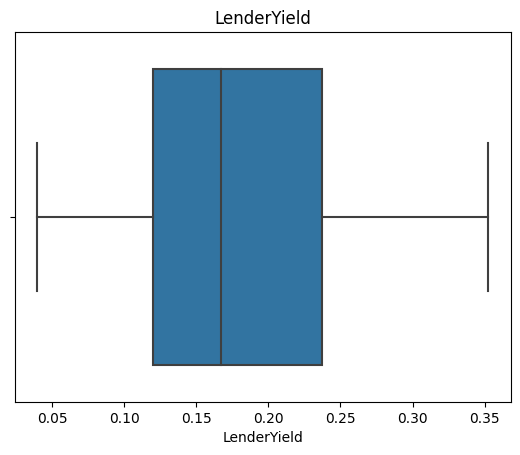

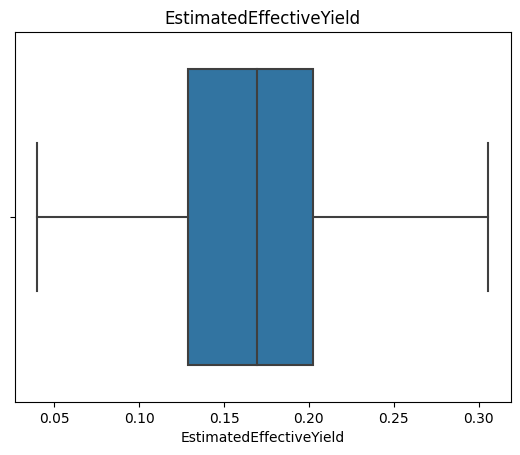

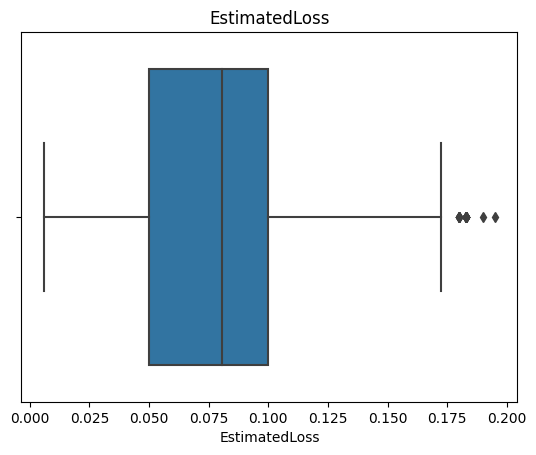

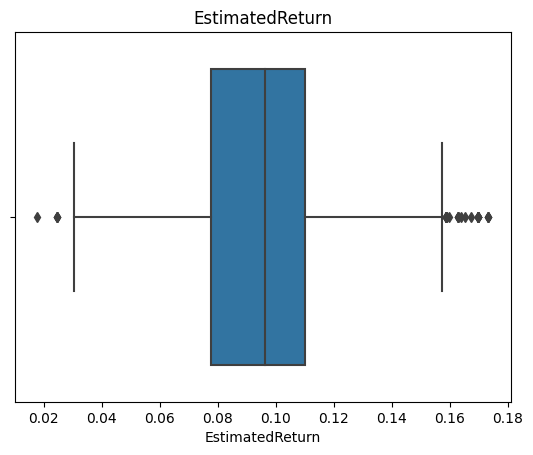

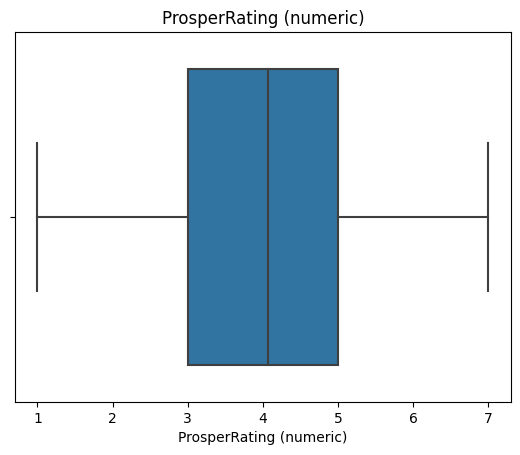

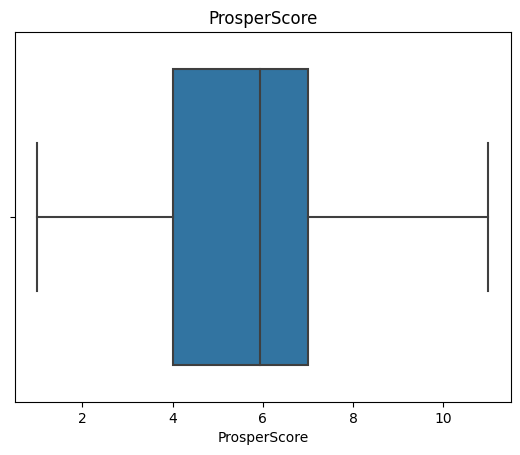

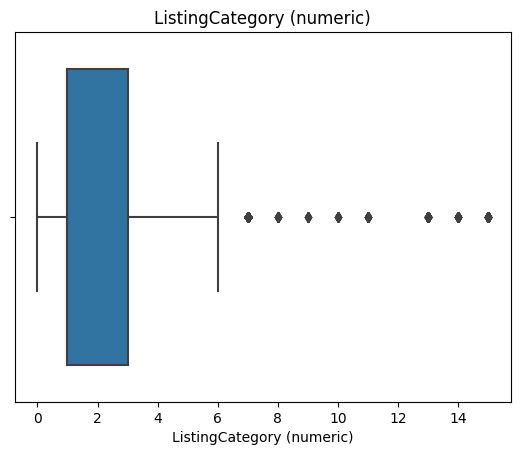

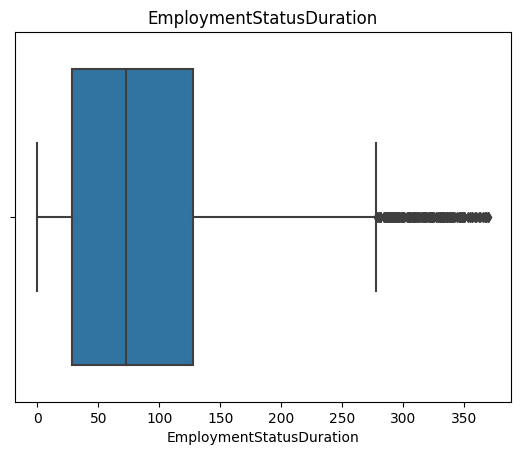

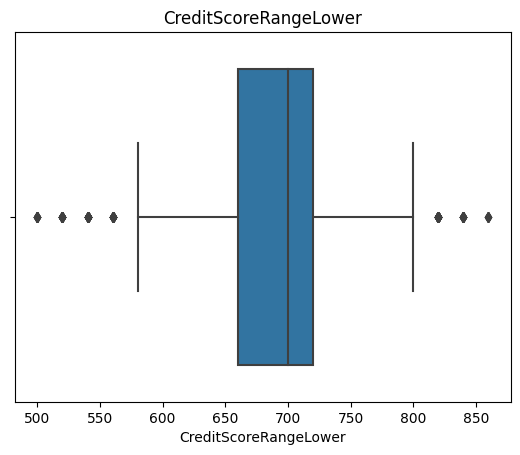

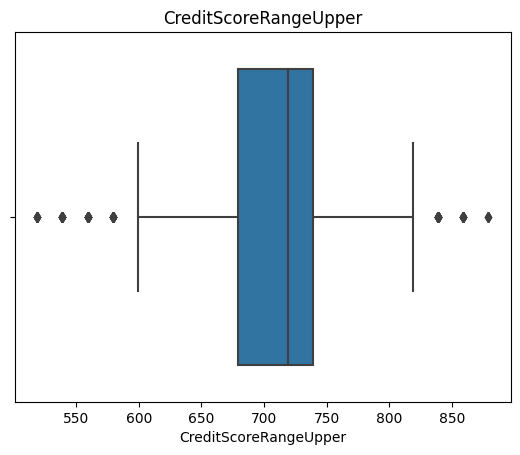

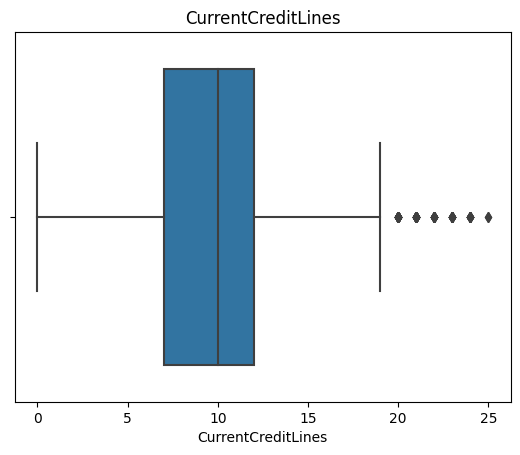

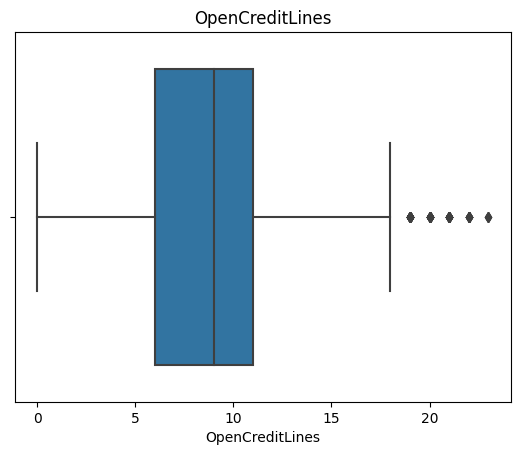

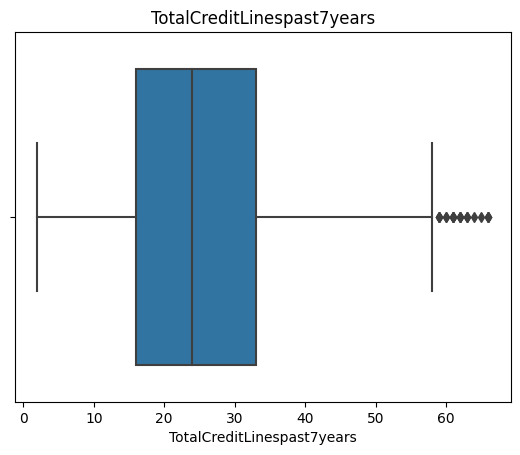

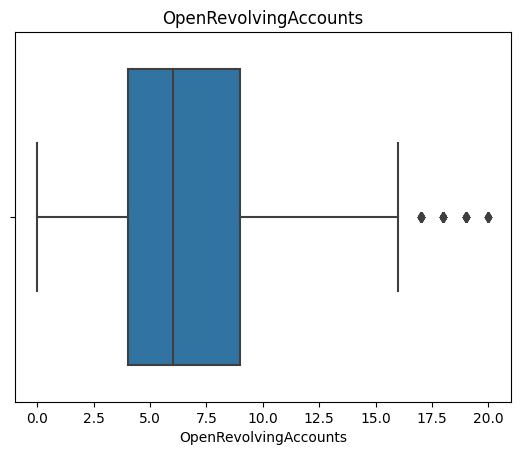

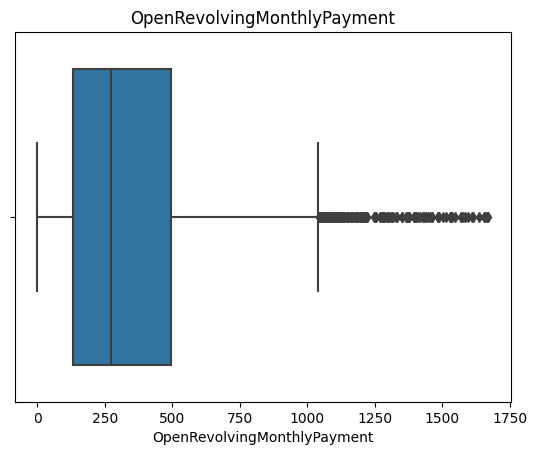

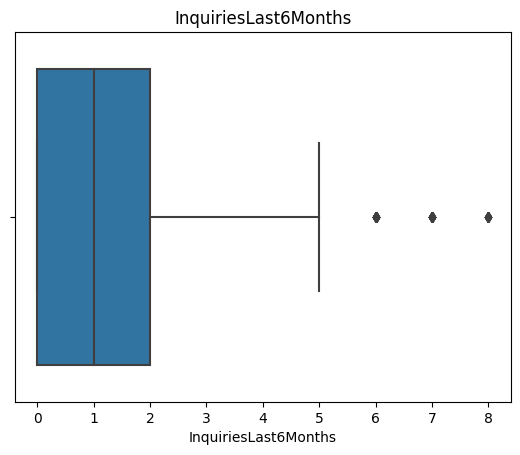

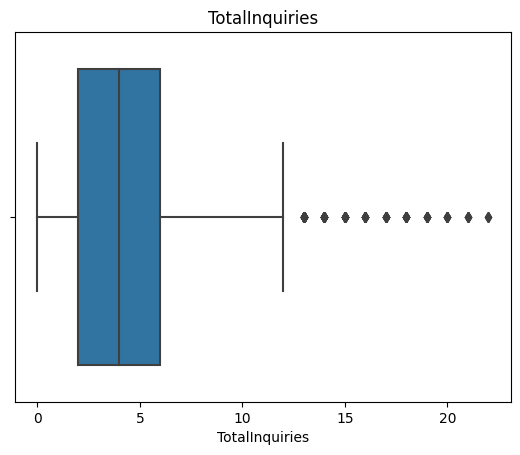

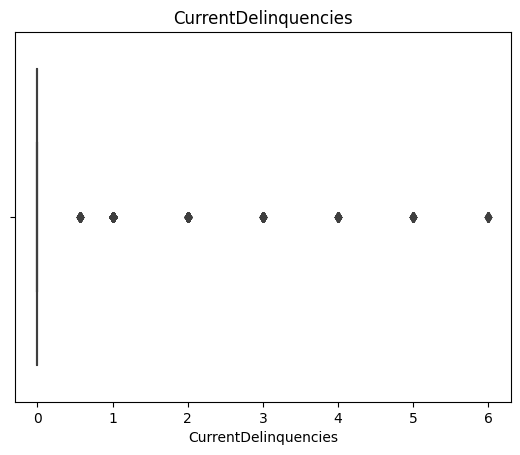

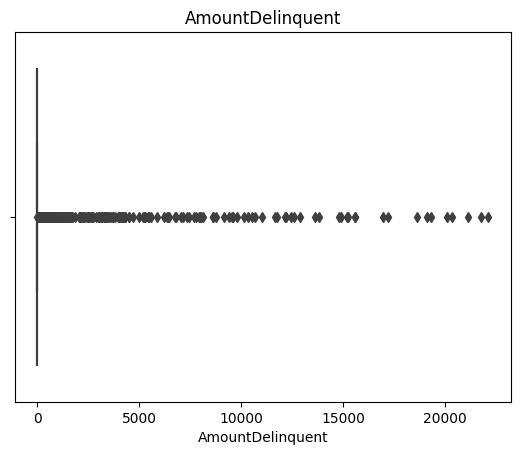

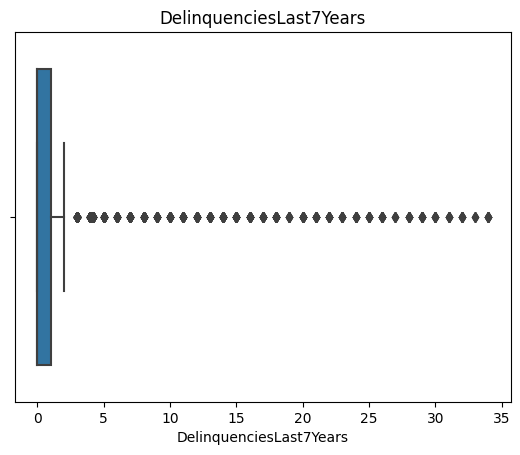

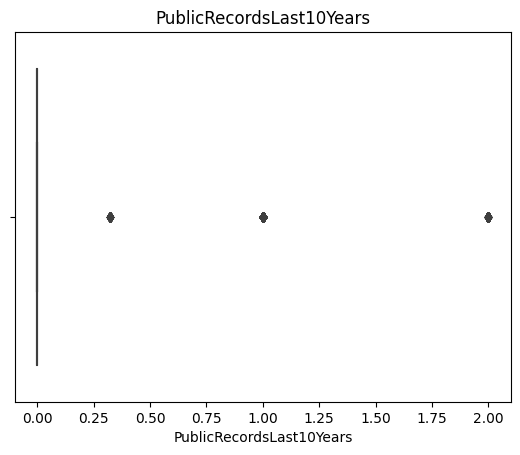

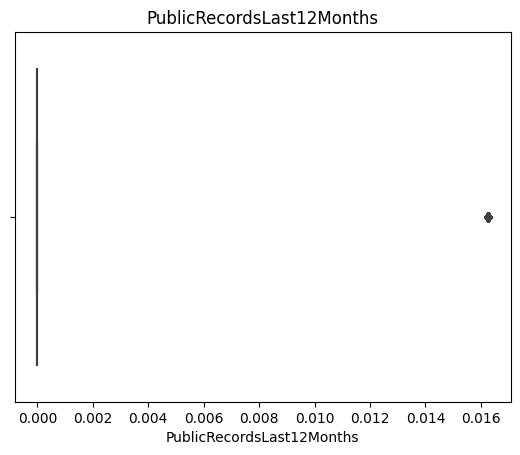

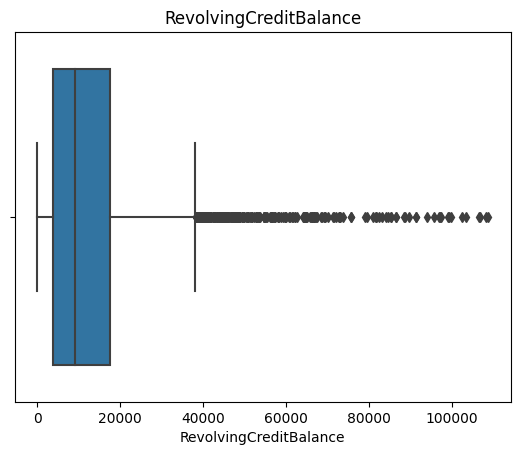

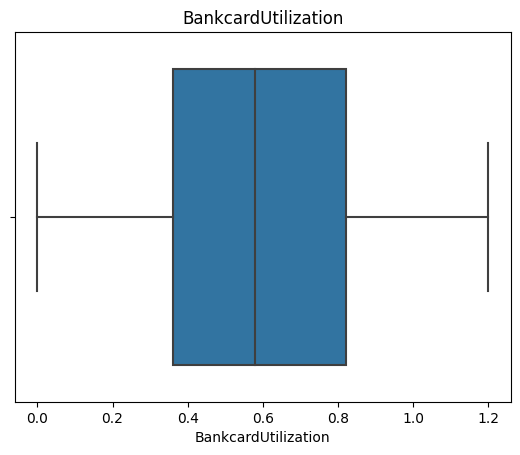

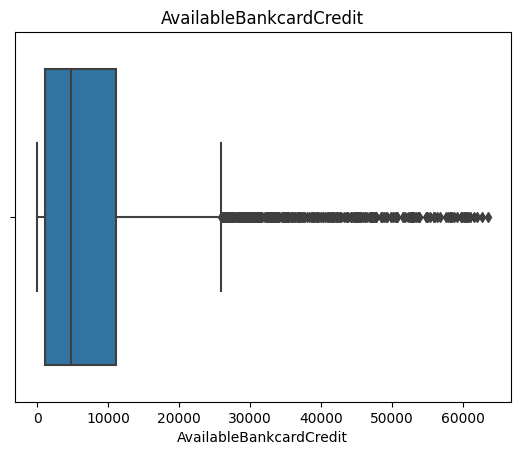

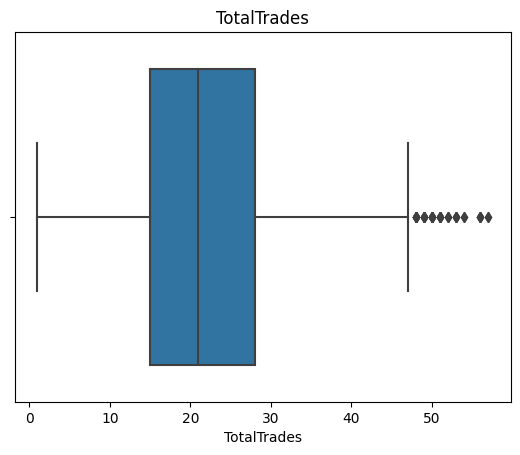

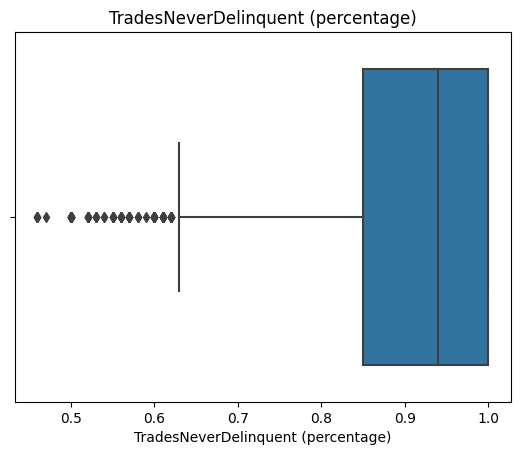

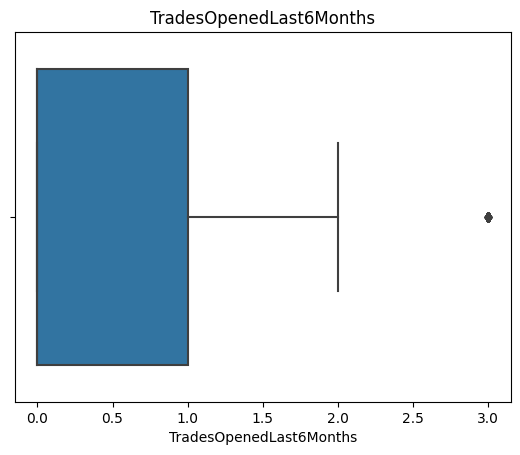

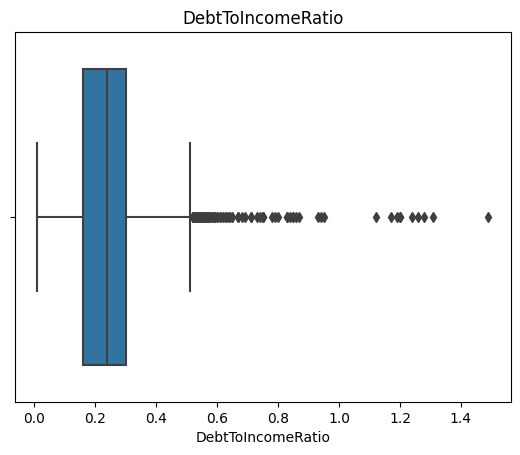

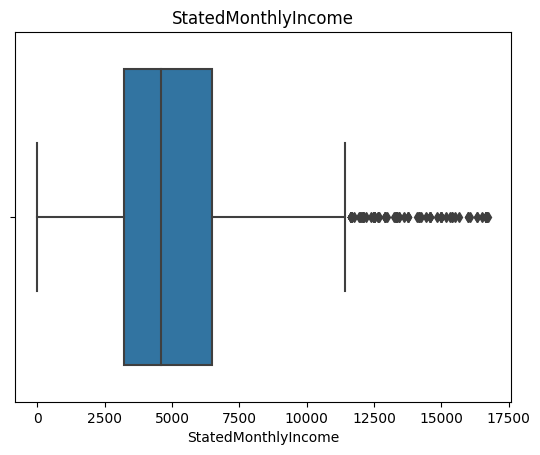

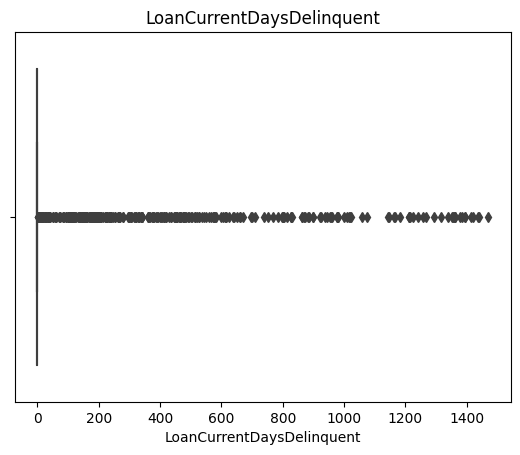

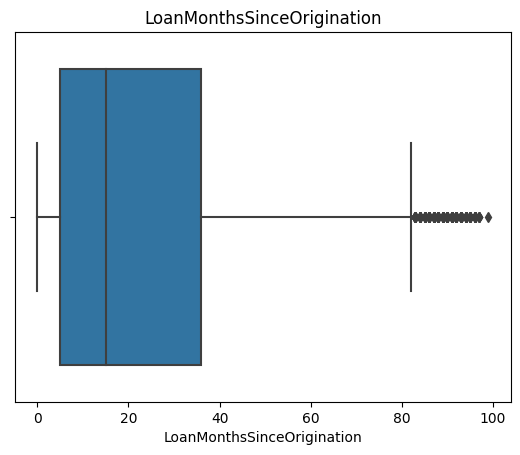

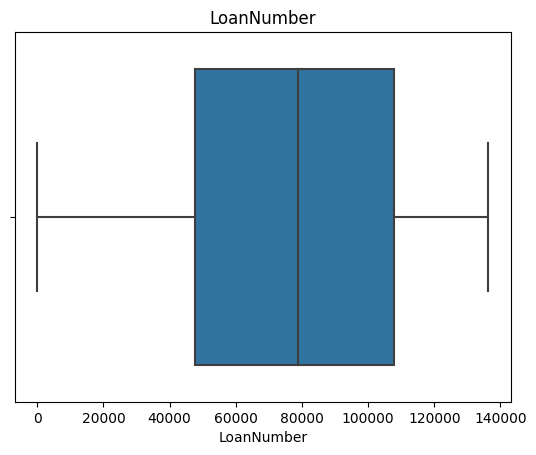

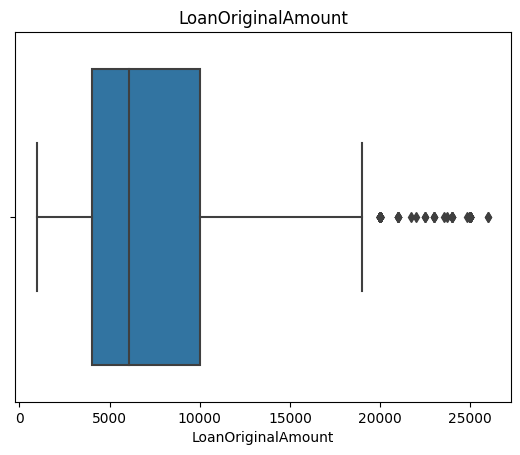

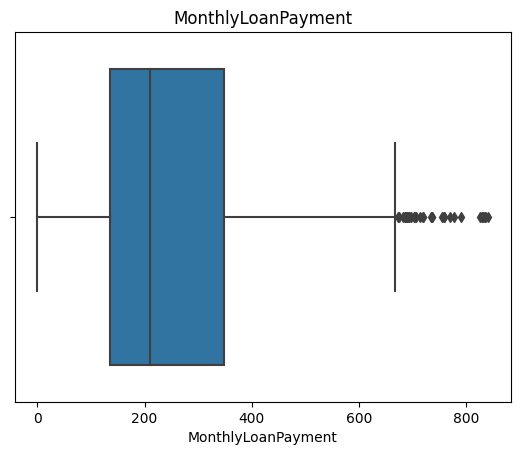

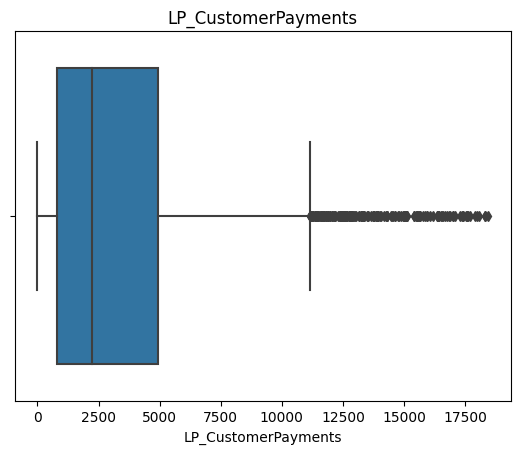

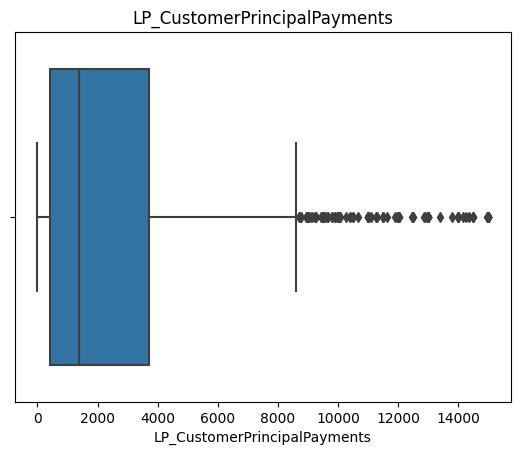

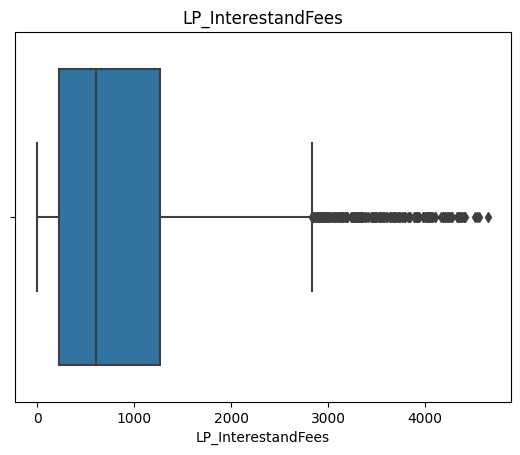

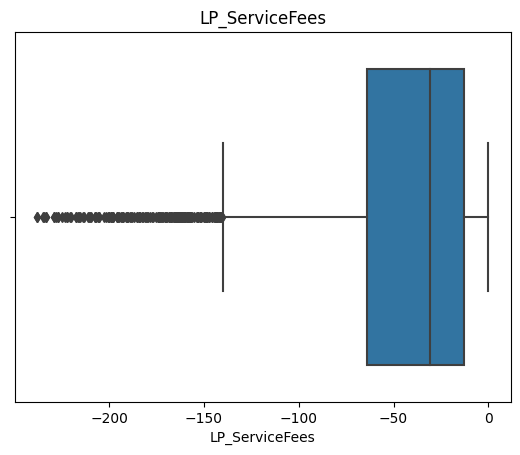

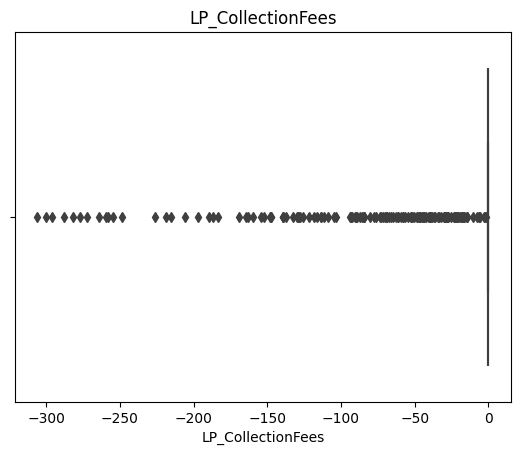

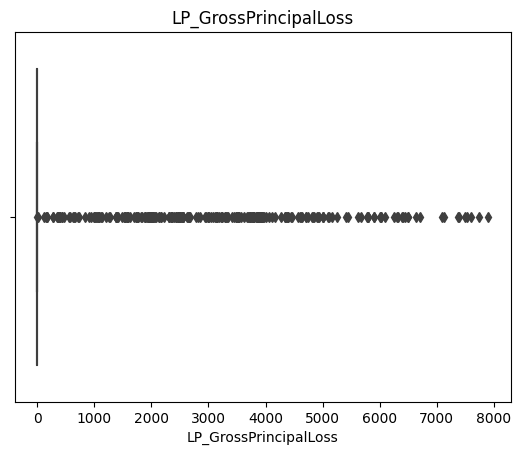

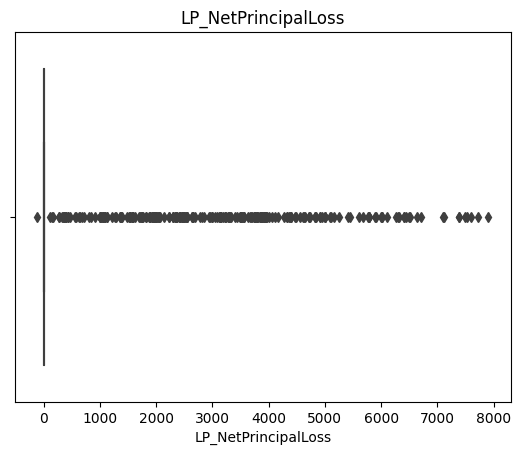

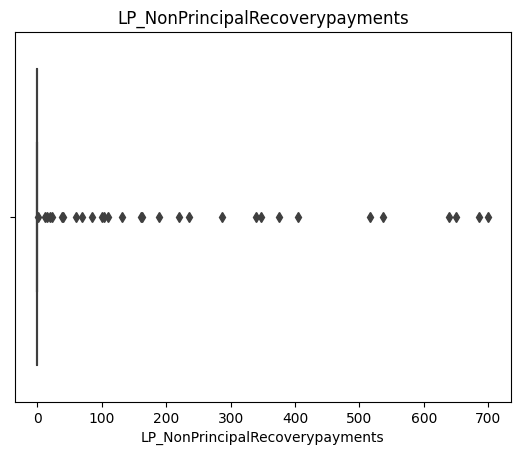

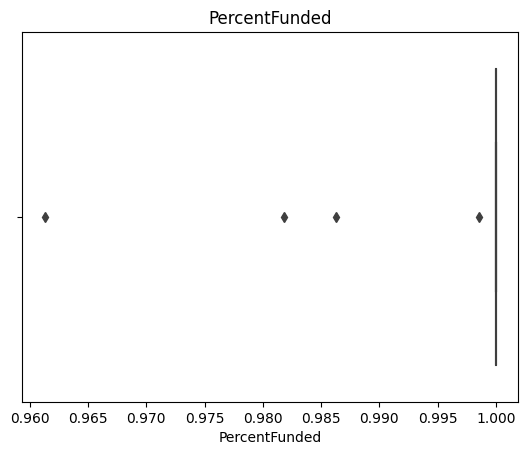

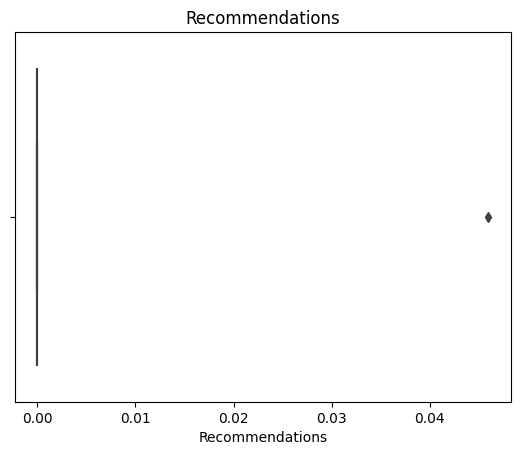

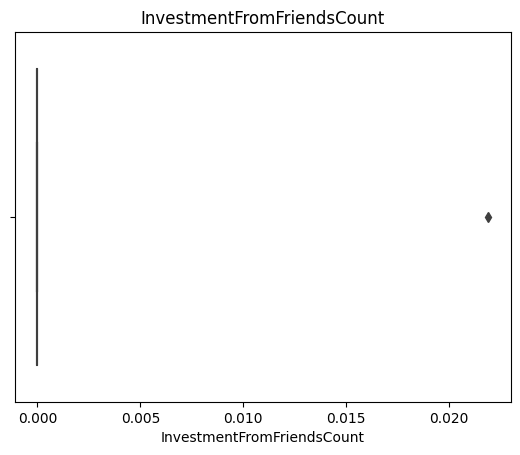

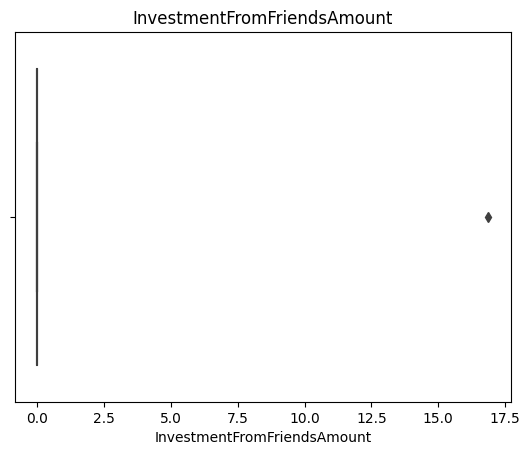

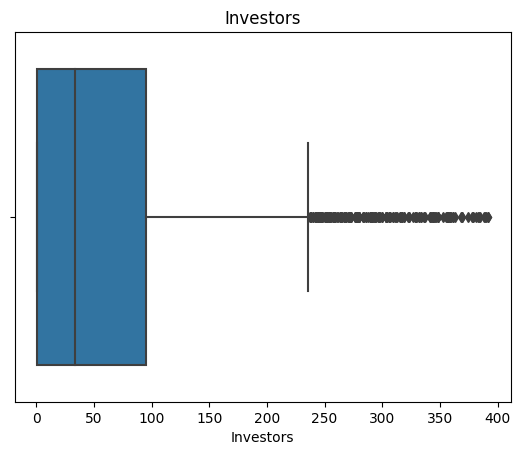

In [ ]:
# Visualize the distribution of numerical columns

numerical_columns = df.select_dtypes(include=np.number).columns
for column in numerical_columns:
    sns.boxplot(x=df[column])
    plt.title(column)
    plt.show()

In [ ]:
corr = df.corr()

<ipython-input-50-45893e33df67>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Figure size 3000x3000 with 0 Axes>

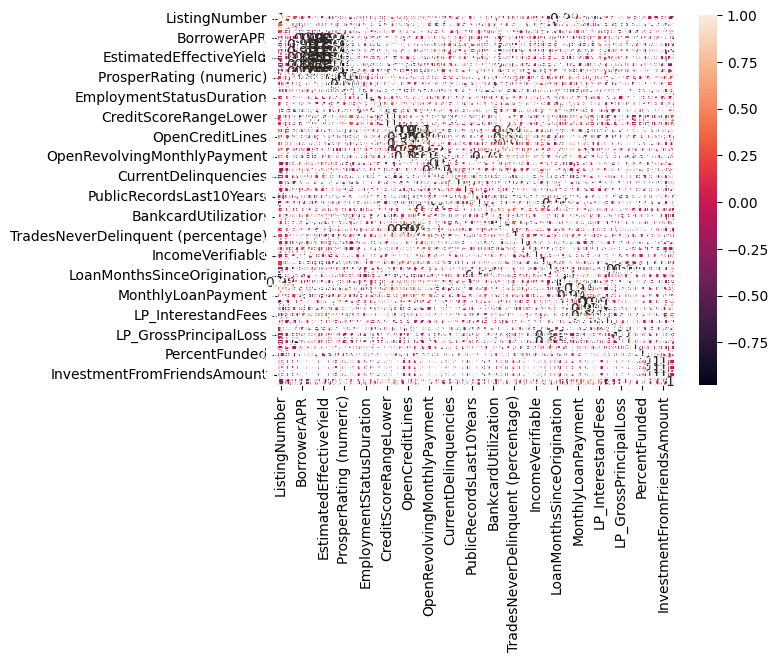

<Figure size 3000x3000 with 0 Axes>

In [ ]:
sns.heatmap(corr, annot=True, linewidth=.5)
plt.figure(figsize=(30,30))